In [1]:
from sequenzo import * # Import the package, give it a short alias
import pandas as pd # Data manipulation

organization_df = pd.read_csv('/Users/lei/Documents/Sequenzo_all_folders/chinese_review_paper/zhou_data/output/zhou_5cat_orgtypes/employment_wide_age_20_45_zhou_5cat_1940s_filtered.csv')

occupation_df = pd.read_csv('/Users/lei/Documents/Sequenzo_all_folders/sequenzo_paper/chinese_review_paper/zhou_data/output/1940s/status/occupation_wide_1940s_20_45.csv')

occupation_df

FileNotFoundError: [Errno 2] No such file or directory: '/Users/lei/Documents/Sequenzo_all_folders/sequenzo_paper/chinese_review_paper/zhou_data/output/1940s/status/occupation_wide_1940s_20_45.csv'

In [ ]:
# Create a SequenceData object for employment sequences

# Extract year columns (1949-1994) - these are the time points
# Year columns are numeric columns between 'id' and background variables
year_cols = [str(year) for year in range(20, 46)]
time_list = [col for col in organization_df.columns if col in year_cols]

# Define states - matching the ORGTYPE_4CAT encoding
states = [5, 4, 3, 2, 1, 0]
labels = ['Hybrid/Market', 'Collective', 'State-owned', 'Public Org', 'Government', 'Missing']
colors = [
    "#F5A6A1",  # Hybrid/Market – soft red
    "#F7D9A8",  # Collective – light apricot
    "#A7D8C9",  # State-owned – mint green
    "#99B7E3",  # Public Org – cool mist blue (更冷、更饱和一点)
    "#D3B5E5",  # Government – purple
    "#ECECEC"   # Missing – same grey
]

# Create SequenceData object
organization_sequence_data = SequenceData(
    organization_df, 
    time=time_list, 
    id_col="id", 
    states=states,
    labels=labels,
    custom_colors=colors
)

organization_sequence_data



[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 824
[>] Number of time points: 26
[>] Min/Max sequence length: 26 / 26
[>] States: [5, 4, 3, 2, 1, 0]
[>] Labels: ['Hybrid/Market', 'Collective', 'State-owned', 'Public Org', 'Government', 'Missing']
[>] Weights: Not provided


SequenceData(824 sequences, States: [5, 4, 3, 2, 1, 0])

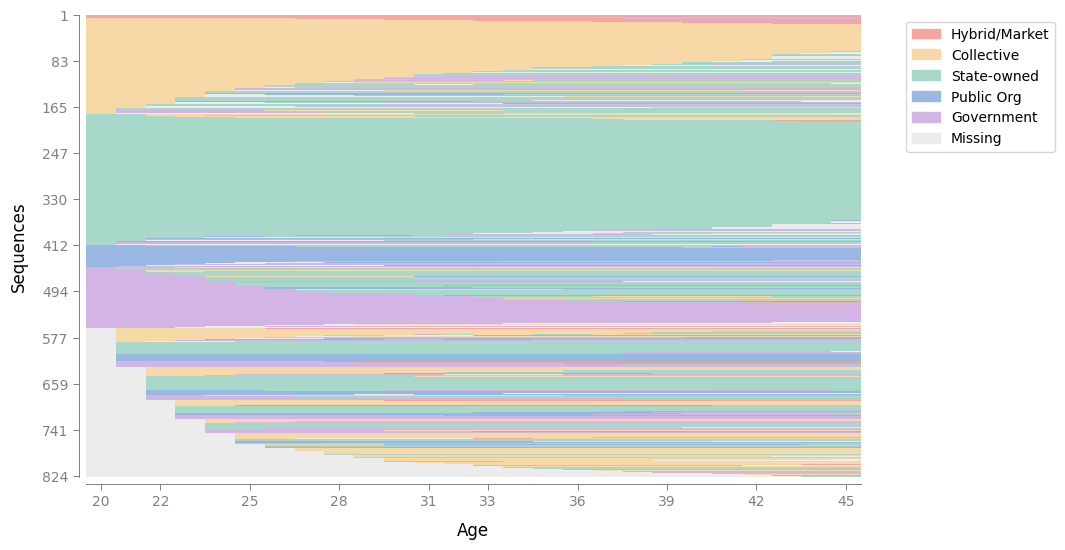

In [ ]:
# Plot the index plot

plot_sequence_index(organization_sequence_data, 
                    xlabel='Age',
                    # save_as='index_plot'
                    )

In [ ]:
# Create a SequenceData object for occupation sequences

# Extract year columns (1949-1994) - these are the time points
# Year columns are numeric columns between 'id' and background variables
year_cols = [str(year) for year in range(20, 46)]
time_list = [col for col in occupation_df.columns if col in year_cols]

# Define states for 8-category occupation encoding
states = [1, 2, 3, 4, 5, 6, 7, 8, 0]
labels = ['Manual', 'Non-manual', 'Professional', 'Managerial', 'Cadre', 'Entrepreneur', 'Student', 'Abroad', 'Missing']
colors = [
    "#A3C9A8",  # Manual, misty green
    "#E9C46A",  # Non-manual, muted golden sand
    "#F4A261",  # Professional, warm terracotta
    "#8AB6D6",  # Managerial, dusty blue
    "#E57373",  # Cadre – soft red (温和、干净、不过分亮)
    "#8B27F5",  # Entrepreneur – purple
    "#2AB7A9",  # Student – aqua teal
    "#BBFCE5",  # Abroad – light green
    "#ECECEC"   # Missing – light grey
]

# Create SequenceData object
occupation_sequence_data = SequenceData(
    occupation_df, 
    time=time_list, 
    id_col="id", 
    states=states,
    labels=labels,
    custom_colors=colors
)

occupation_sequence_data



[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 824
[>] Number of time points: 26
[>] Min/Max sequence length: 26 / 26
[>] States: [1, 2, 3, 4, 5, 6, 7, 8, 0]
[>] Labels: ['Manual', 'Non-manual', 'Professional', 'Managerial', 'Cadre', 'Entrepreneur', 'Student', 'Abroad', 'Missing']
[>] Weights: Not provided


SequenceData(824 sequences, States: [1, 2, 3, 4, 5, 6, 7, 8, 0])

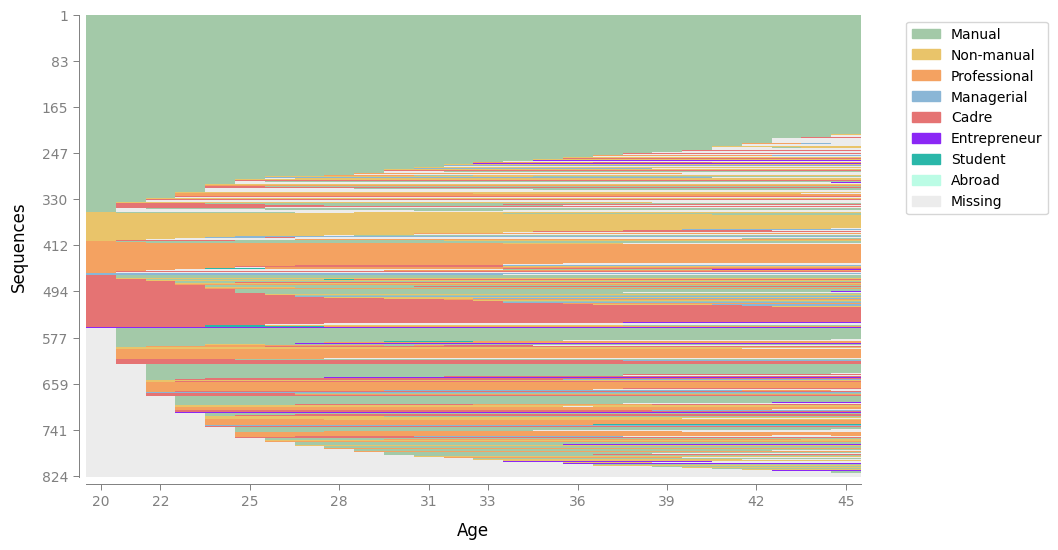

In [ ]:
# Plot the index plot

plot_sequence_index(occupation_sequence_data, 
                    xlabel='Age',
                    # save_as='index_plot'
                    )

In [ ]:
sequence_data = [organization_sequence_data, occupation_sequence_data]

result = get_association_between_domains(
    sequence_data,
    assoc=["V", "LRT"],
    rep_method="overall",
    cross_table=True,
    weighted=True,
    dnames=["organization", "occupation"], 
    # It is domain name that you specify by yourself, e.g., seq_left - > left
    explain=True,
)


📜 Full results table:


,df,LRT,p(LRT),v,p(v),strength
organization vs occupation,40.0,15271.013679,0.000 ***,0.472097,0.000 ***,Moderate



📘 Column explanations:
  - df       : Degrees of freedom for the test (typically 1 for binary state sequences).
  - LRT      : Likelihood Ratio Test statistic (higher = stronger dependence).
  - p(LRT)   : p-value for LRT + significance stars: * (p<.05), ** (p<.01), *** (p<.001)
  - v        : Cramer's V statistic (0 to 1, measures association strength).
  - p(v)     : p-value for Cramer's V (based on chi-squared test) + significance stars: * (p<.05), ** (p<.01), *** (p<.001)
  - strength : Qualitative label for association strength based on Cramer's V:
               0.00-0.09 -> None, 0.10-0.29 -> Weak, 0.30-0.49 -> Moderate, >=0.50 -> Strong


In [ ]:
cat_distance_matrix = compute_cat_distance_matrix(sequence_data, 
                                                  method="OM", 
                                                  sm=["CONSTANT"],
                                                  indel=[1, 1],  # indel=[1, 1] if you have two domains
                                                  what="diss", 
                                                  link="sum")

cat_distance_matrix

[>] 2 domains with 824 sequences.
[>] Building MD sequences of combined states.
  - OK.
[>] Computing substitution cost matrix for domain 0.
[>] Computing substitution cost matrix for domain 1.
[>] Computing MD substitution and indel costs with additive trick.
  - OK.
[>] Computing MD distances using additive trick.
  - OK.


,110101025,110102012,110103037,110103040,110103041,110103319,110104055,110105001,110105008,110106171,...,620314132,620314133,620314137,620315141,620315144,620315150,620316157,620317162,620318173,620318178
110101025,0.0,88.0,80.0,80.0,80.0,88.0,52.0,98.0,68.0,82.0,...,80.0,80.0,70.0,80.0,66.0,72.0,76.0,72.0,80.0,80.0
110102012,88.0,0.0,100.0,100.0,100.0,4.0,56.0,100.0,54.0,74.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
110103037,80.0,100.0,0.0,0.0,50.0,100.0,88.0,96.0,54.0,100.0,...,50.0,50.0,50.0,0.0,24.0,16.0,4.0,22.0,12.0,4.0
110103040,80.0,100.0,0.0,0.0,50.0,100.0,88.0,96.0,54.0,100.0,...,50.0,50.0,50.0,0.0,24.0,16.0,4.0,22.0,12.0,4.0
110103041,80.0,100.0,50.0,50.0,0.0,100.0,94.0,98.0,54.0,100.0,...,0.0,0.0,100.0,50.0,64.0,58.0,54.0,54.0,56.0,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620315150,72.0,100.0,16.0,16.0,58.0,100.0,88.0,96.0,58.0,84.0,...,58.0,58.0,58.0,16.0,12.0,0.0,16.0,26.0,16.0,16.0
620316157,76.0,100.0,4.0,4.0,54.0,100.0,84.0,96.0,54.0,100.0,...,54.0,54.0,50.0,4.0,20.0,16.0,0.0,22.0,12.0,6.0
620317162,72.0,100.0,22.0,22.0,54.0,96.0,88.0,88.0,46.0,78.0,...,54.0,54.0,68.0,22.0,32.0,26.0,22.0,0.0,16.0,18.0
620318173,80.0,100.0,12.0,12.0,56.0,96.0,88.0,84.0,48.0,88.0,...,56.0,56.0,56.0,12.0,24.0,16.0,12.0,16.0,0.0,8.0


[>] Converting DataFrame to NumPy array...
[!] Warning: Distance matrix contains negative values. Clipping to zero...


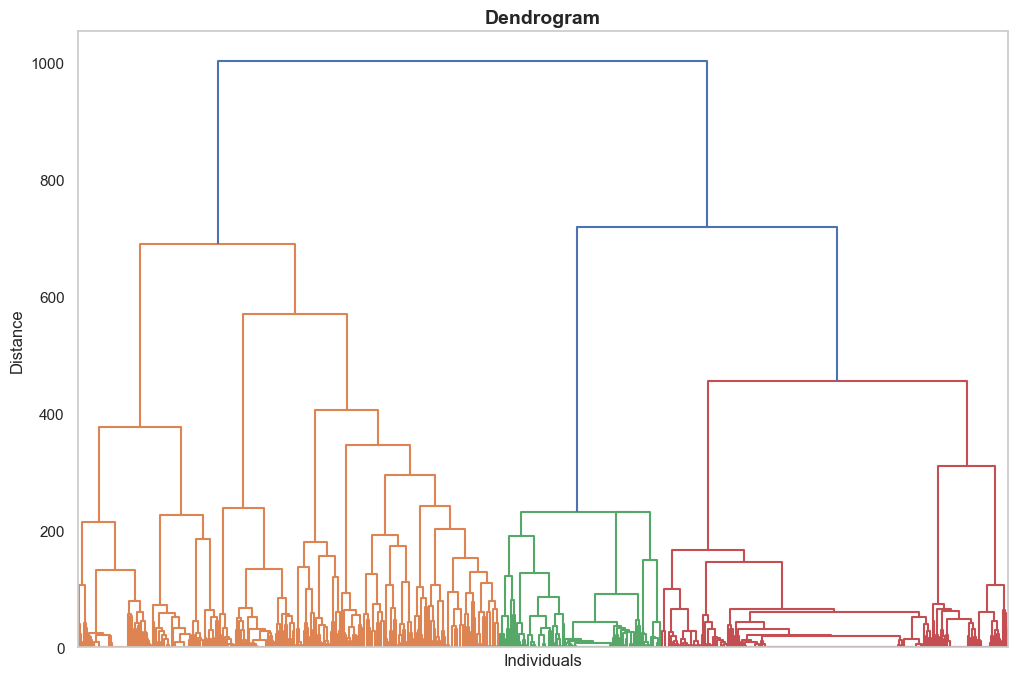

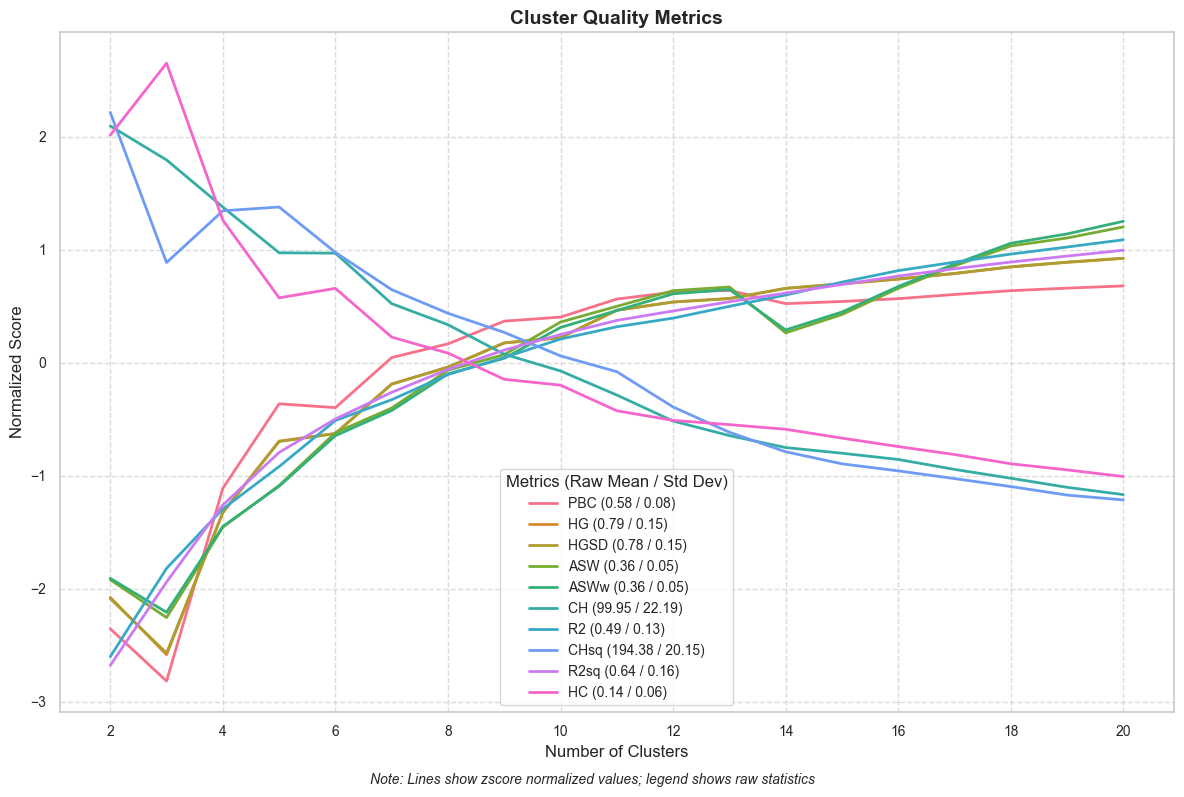

  Metric  Opt. Clusters   Raw Value  Z-Score Norm.
0    PBC             20    0.627239       0.680572
1     HG             20    0.921758       0.924154
2   HGSD             20    0.919095       0.925931
3    ASW             20    0.413852       1.202450
4   ASWw             20    0.428837       1.252627
5     CH              2  146.453815       2.096166
6     R2             20    0.636464       1.088683
7   CHsq              2  239.022108       2.215253
8   R2sq             20    0.800644       0.996408
9     HC              3    0.295712       2.650777


In [ ]:
cluster = Cluster(cat_distance_matrix, organization_sequence_data.ids, clustering_method='ward_d2')
cluster.plot_dendrogram(xlabel="Individuals", ylabel="Distance")

# Create a ClusterQuality object to evaluate clustering quality
cluster_quality = ClusterQuality(cluster)
cluster_quality.compute_cluster_quality_scores()
cluster_quality.plot_cqi_scores(norm='zscore')
summary_table = cluster_quality.get_cqi_table()
print(summary_table)

     Entity ID  Cluster
0    110101025        3
1    110102012        1
2    110103037        5
3    110103040        5
4    110103041        6
..         ...      ...
819  620315150        5
820  620316157        5
821  620317162        5
822  620318173        5
823  620318178        5

[824 rows x 2 columns]
   Cluster  Count  Percentage
0        1    125       15.17
1        2     68        8.25
2        3    181       21.97
3        4    143       17.35
4        5    240       29.13
5        6     67        8.13


/Users/lei/Documents/Sequenzo_all_folders/Sequenzo-main/sequenzo/clustering/hierarchical_clustering.py:1229: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Cluster', y=y_column, data=distribution, palette='pastel')


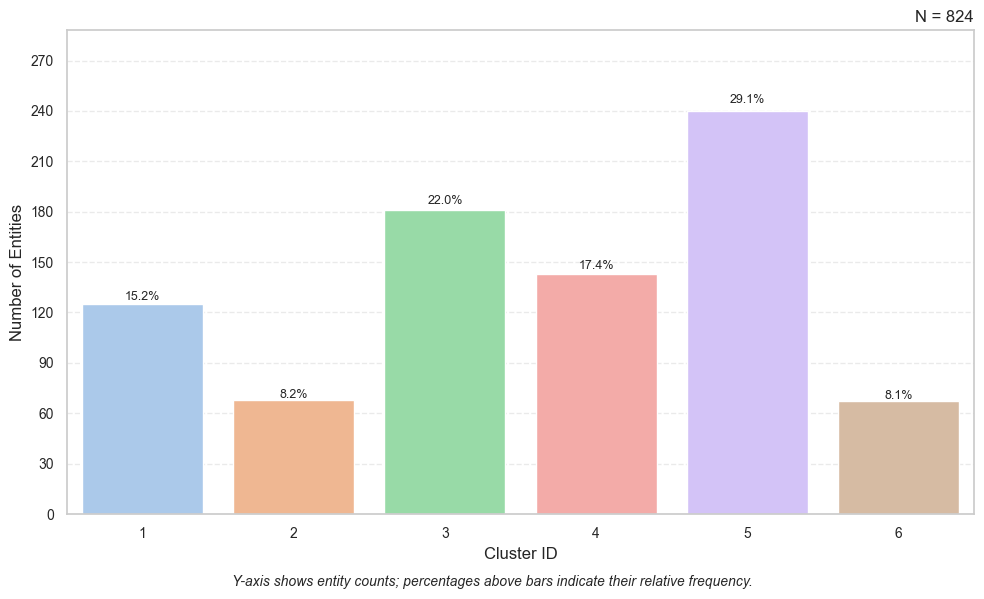

In [ ]:
cluster_results = ClusterResults(cluster)
membership_table = cluster_results.get_cluster_memberships(num_clusters=6)
print(membership_table)
distribution = cluster_results.get_cluster_distribution(num_clusters=6)
print(distribution)
cluster_results.plot_cluster_distribution(num_clusters=6, save_as="distribution.png", title=None)

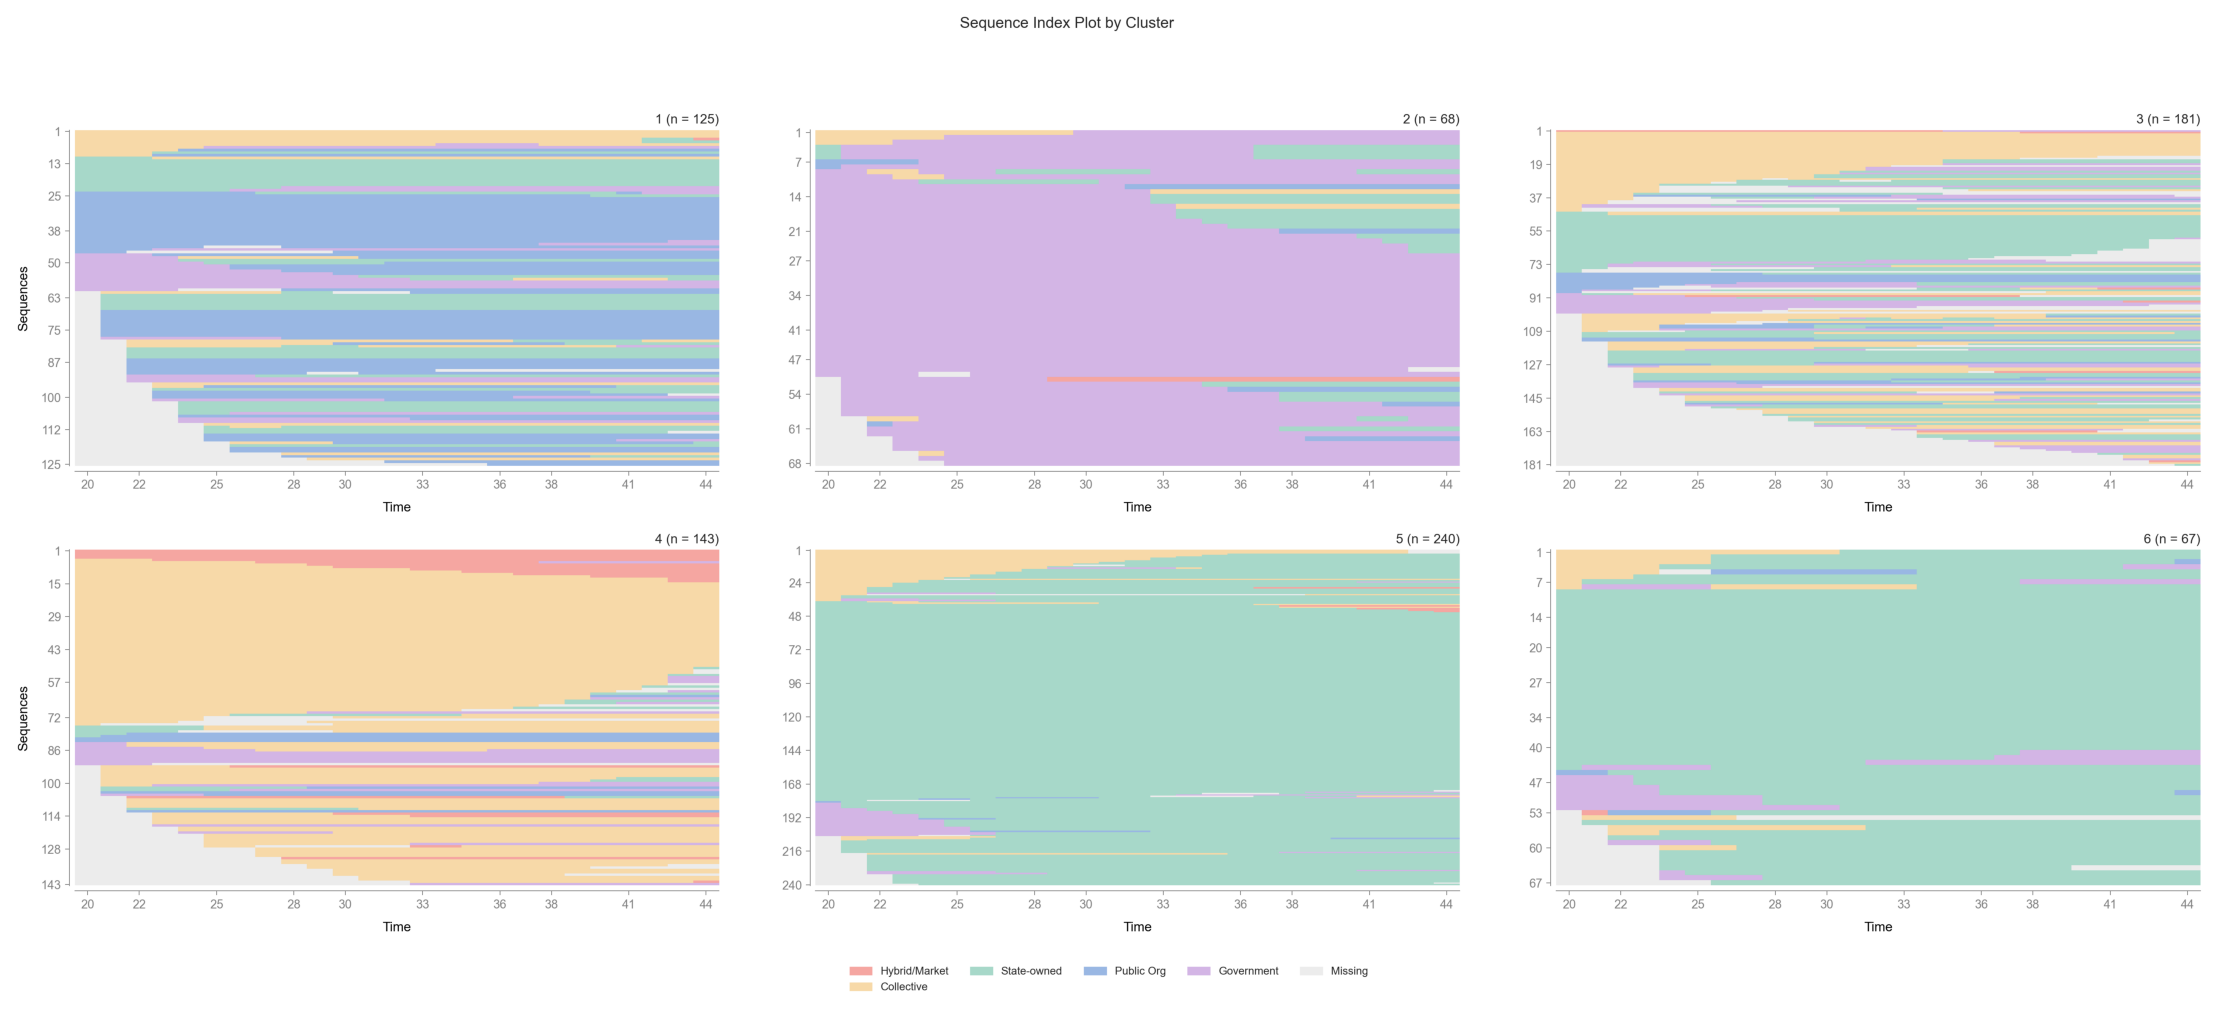

In [ ]:
plot_sequence_index(
    organization_sequence_data,
    group_dataframe=membership_table,
    group_column_name="Cluster",
    # group_labels={1: "Late Family Formation", 2: "Early Partnership"},
    layout="column",
    title="Sequence Index Plot by Cluster"
)

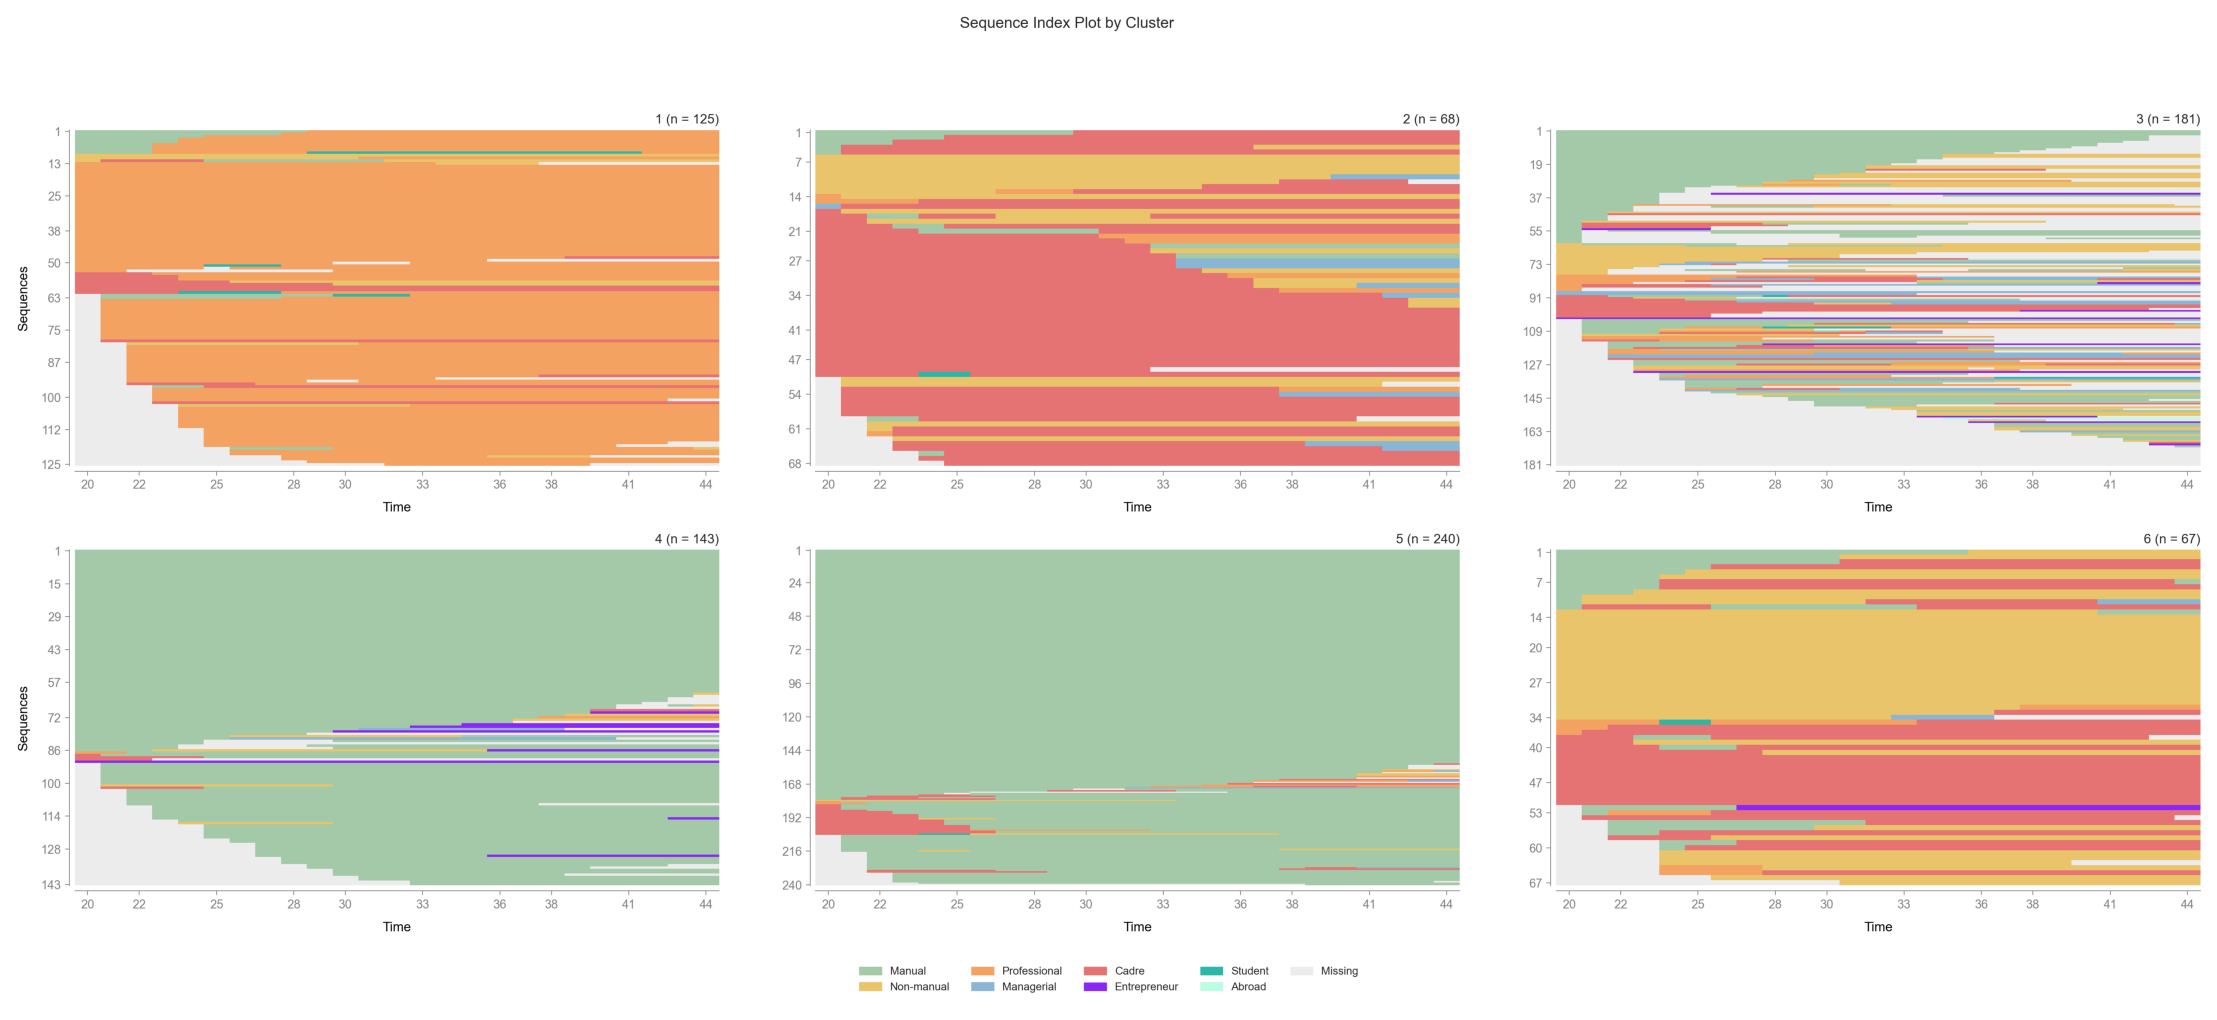

In [ ]:
plot_sequence_index(
    occupation_sequence_data,
    group_dataframe=membership_table,
    group_column_name="Cluster",
    # group_labels={1: "Late Family Formation", 2: "Early Partnership"},
    layout="column",
    title="Sequence Index Plot by Cluster"
)

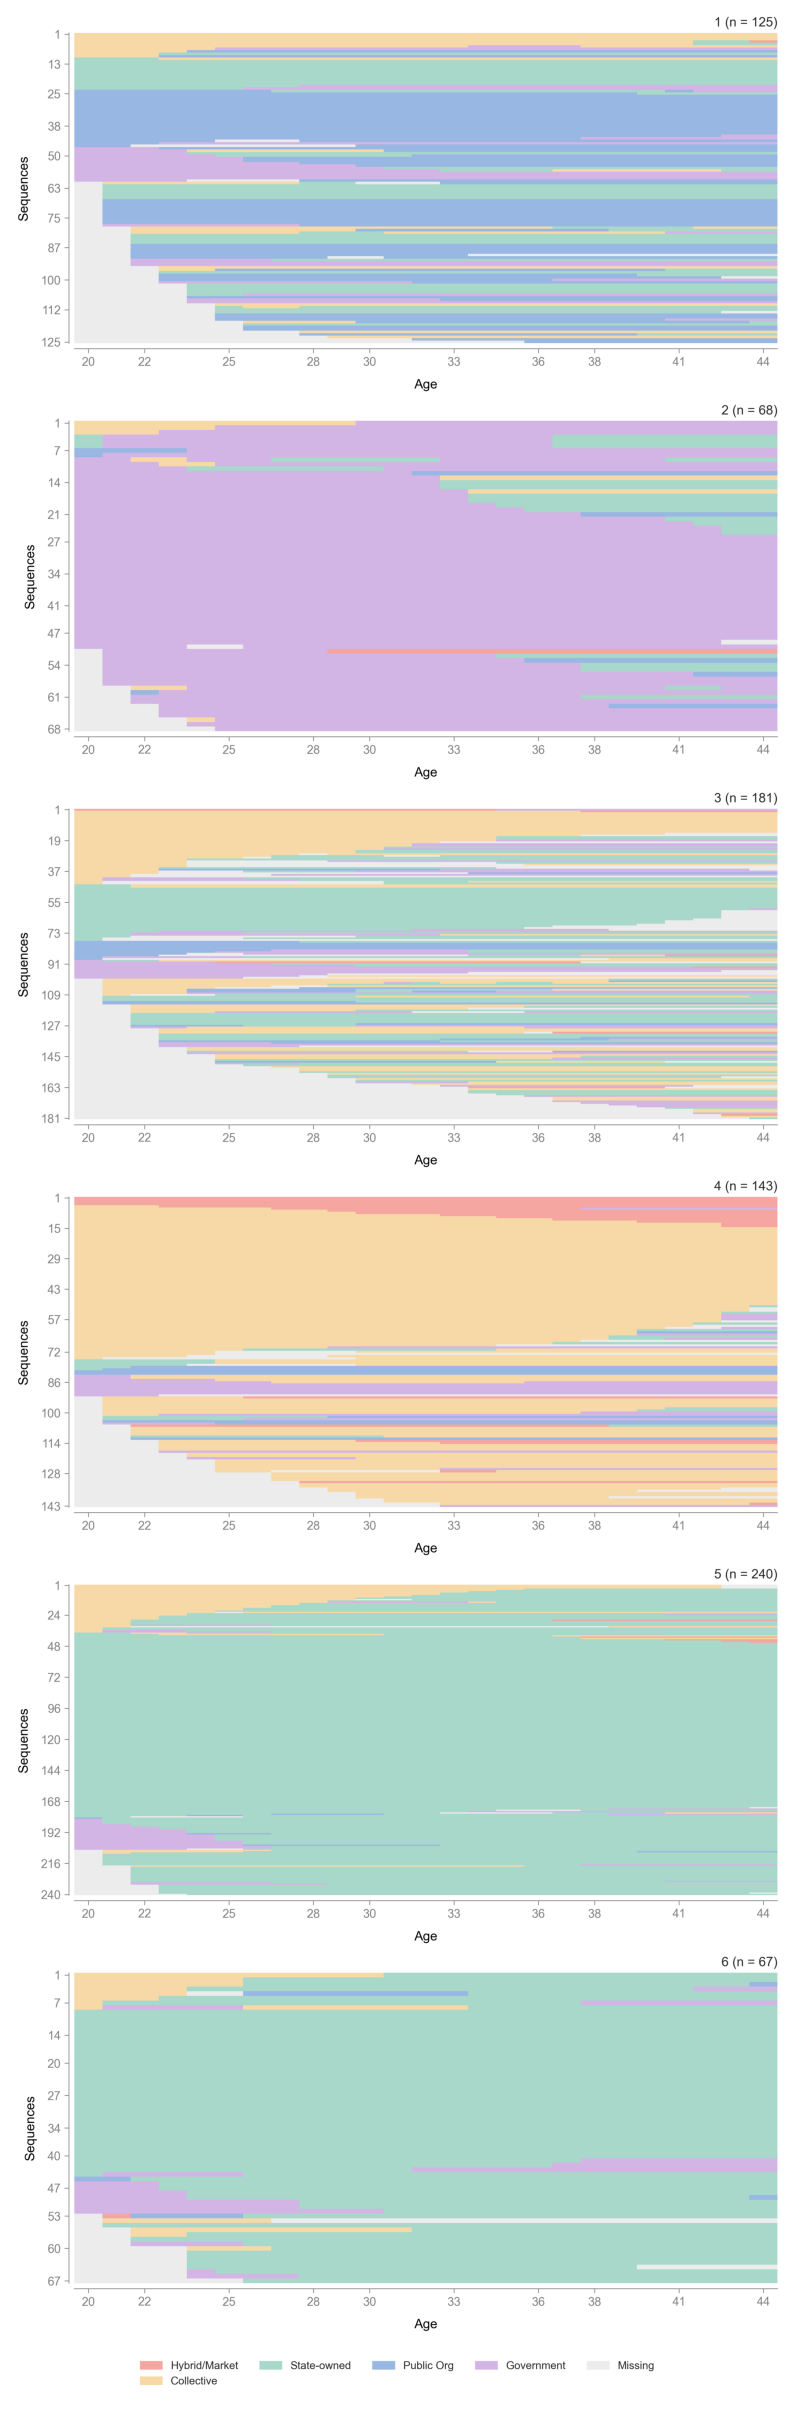

In [ ]:
plot_sequence_index(
    organization_sequence_data,
    group_dataframe=membership_table,
    group_column_name="Cluster",
    # group_labels={1: "Late Family Formation", 2: "Early Partnership"},
    layout="column",
    nrows=6,
    ncols=1,
    title=None,
    save_as="organization_sequence_index_plot_by_6_clusters.png",
    dpi=300,
    xlabel="Age",
)

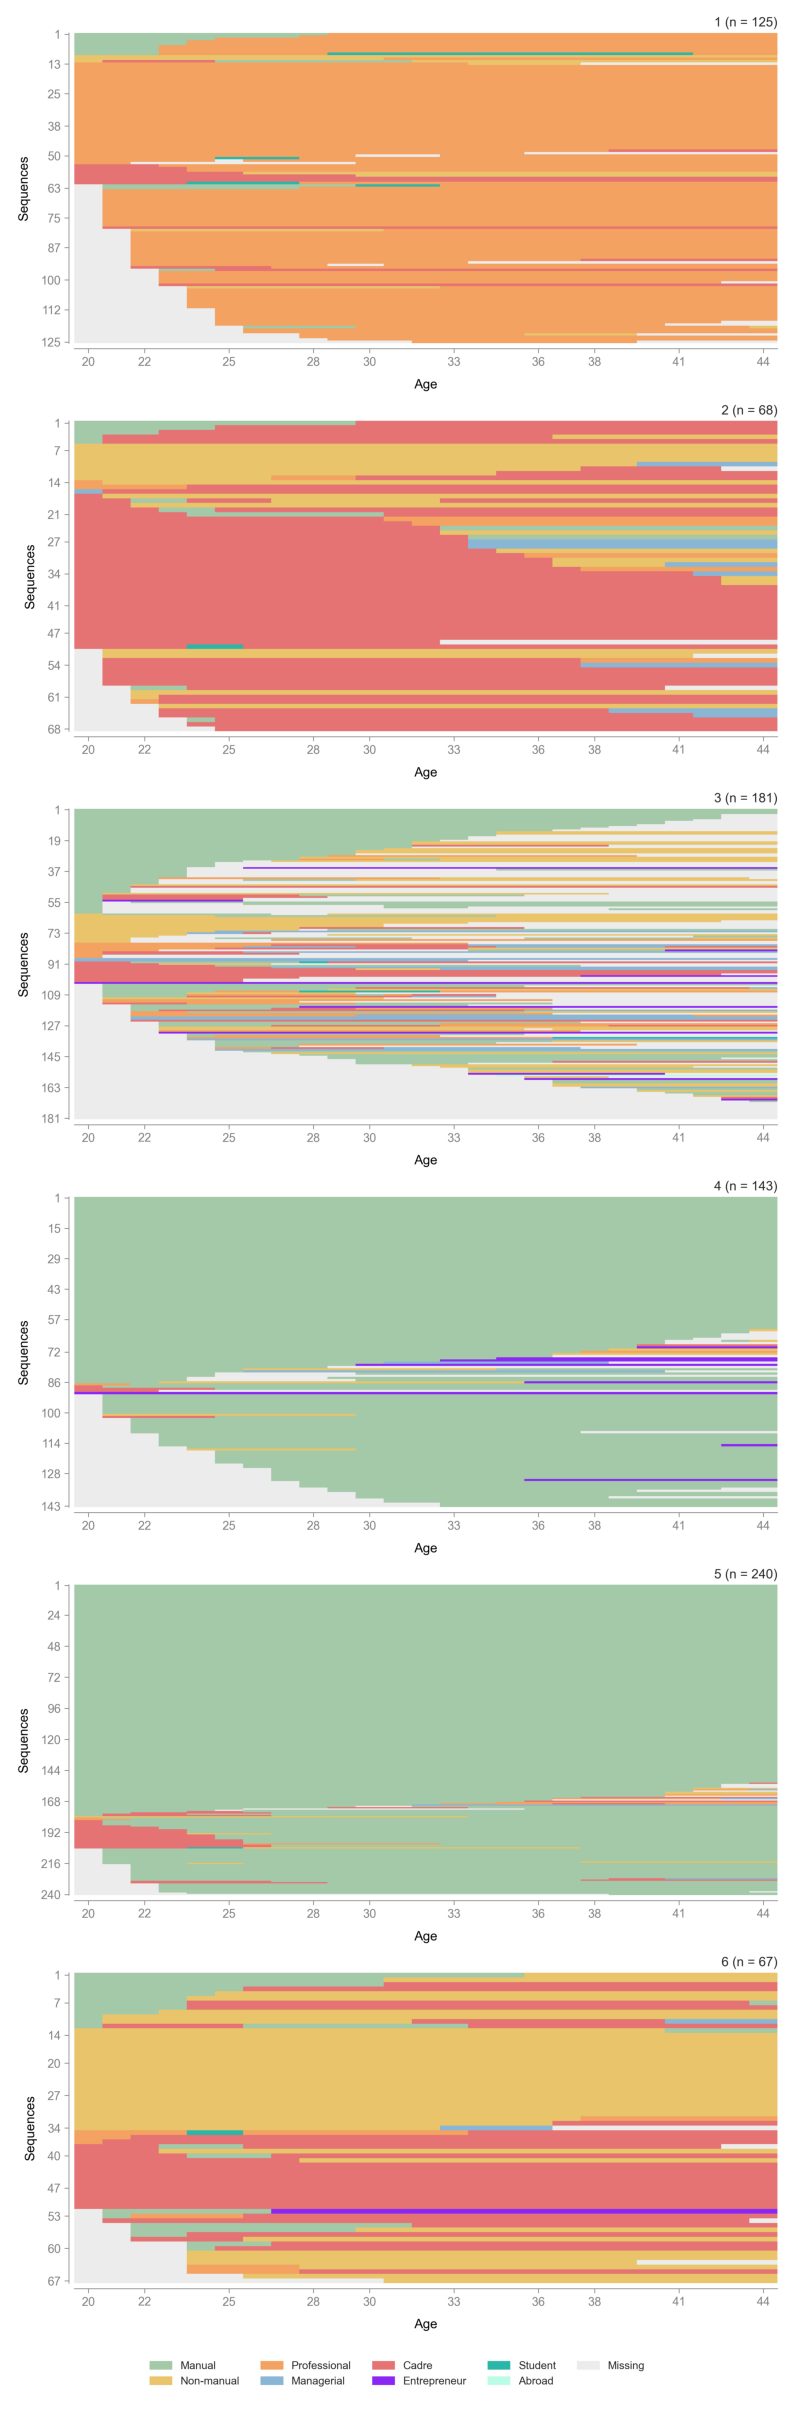

In [ ]:
plot_sequence_index(
    occupation_sequence_data,
    group_dataframe=membership_table,
    group_column_name="Cluster",
    # group_labels={1: "Late Family Formation", 2: "Early Partnership"},
    layout="column",
    nrows=6,
    ncols=1,
    title=None,
    save_as="occupation_sequence_index_plot_by_6_clusters.png",
    dpi=300,
    xlabel="Age",
)

Try 5 clusters

     Entity ID  Cluster
0    110101025        3
1    110102012        1
2    110103037        5
3    110103040        5
4    110103041        5
..         ...      ...
819  620315150        5
820  620316157        5
821  620317162        5
822  620318173        5
823  620318178        5

[824 rows x 2 columns]
   Cluster  Count  Percentage
0        1    125       15.17
1        2     68        8.25
2        3    181       21.97
3        4    143       17.35
4        5    307       37.26


/Users/lei/Documents/Sequenzo_all_folders/Sequenzo-main/sequenzo/clustering/hierarchical_clustering.py:1229: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Cluster', y=y_column, data=distribution, palette='pastel')


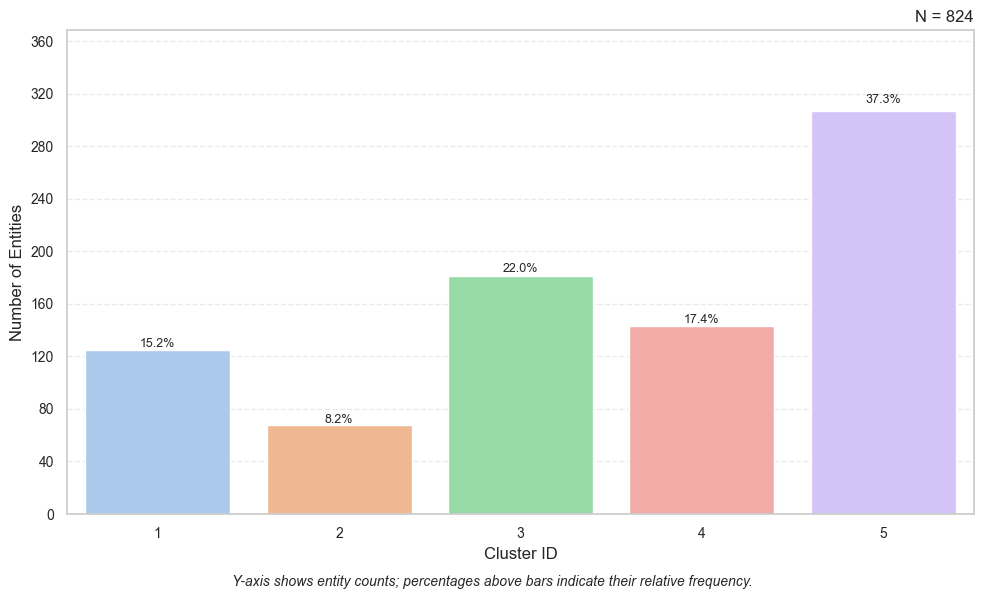

In [ ]:
cluster_results = ClusterResults(cluster)
membership_table = cluster_results.get_cluster_memberships(num_clusters=5)
print(membership_table)
distribution = cluster_results.get_cluster_distribution(num_clusters=5)
print(distribution)
cluster_results.plot_cluster_distribution(num_clusters=5, save_as="distribution.png", title=None)

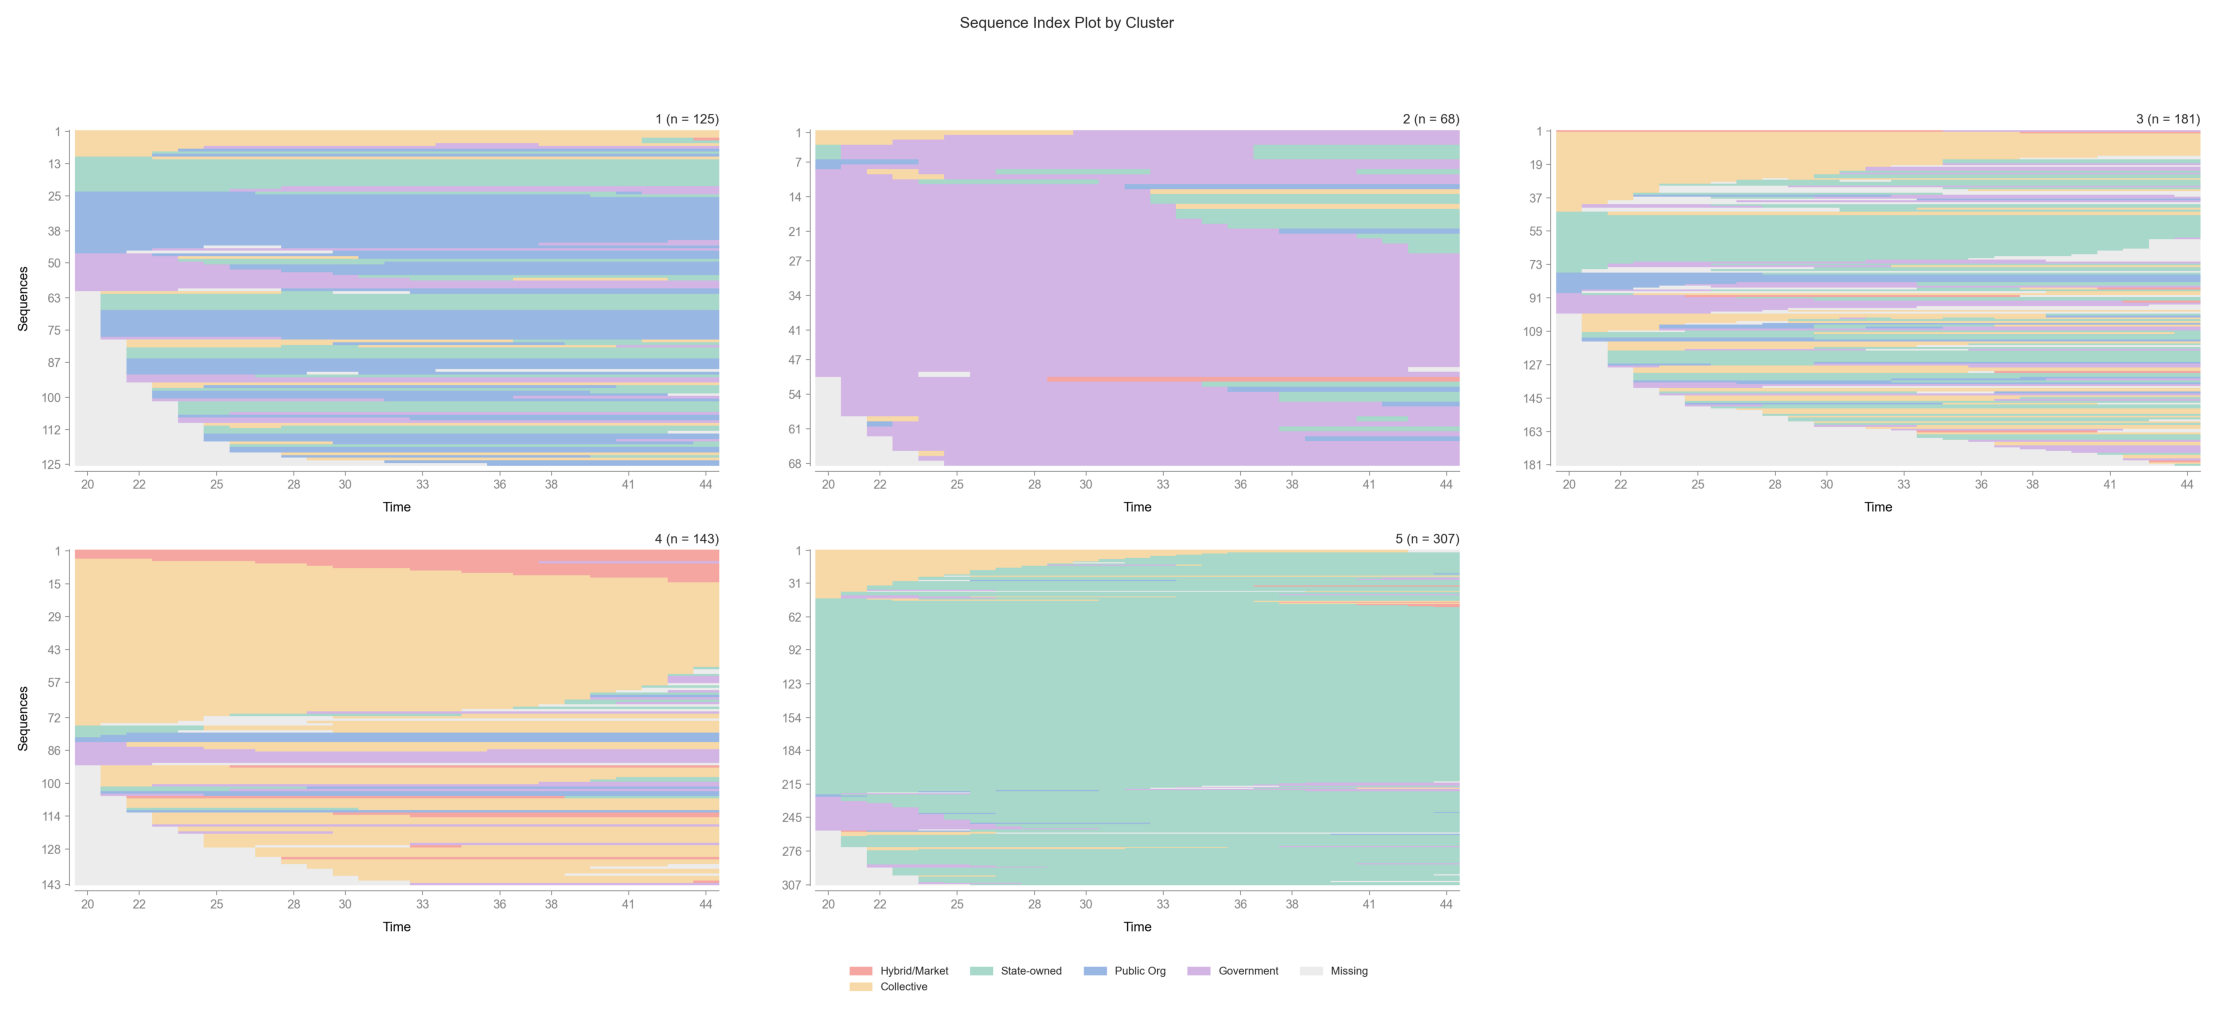

In [ ]:
plot_sequence_index(
    organization_sequence_data,
    group_dataframe=membership_table,
    group_column_name="Cluster",
    # group_labels={1: "Late Family Formation", 2: "Early Partnership"},
    layout="column",
    title="Sequence Index Plot by Cluster"
)

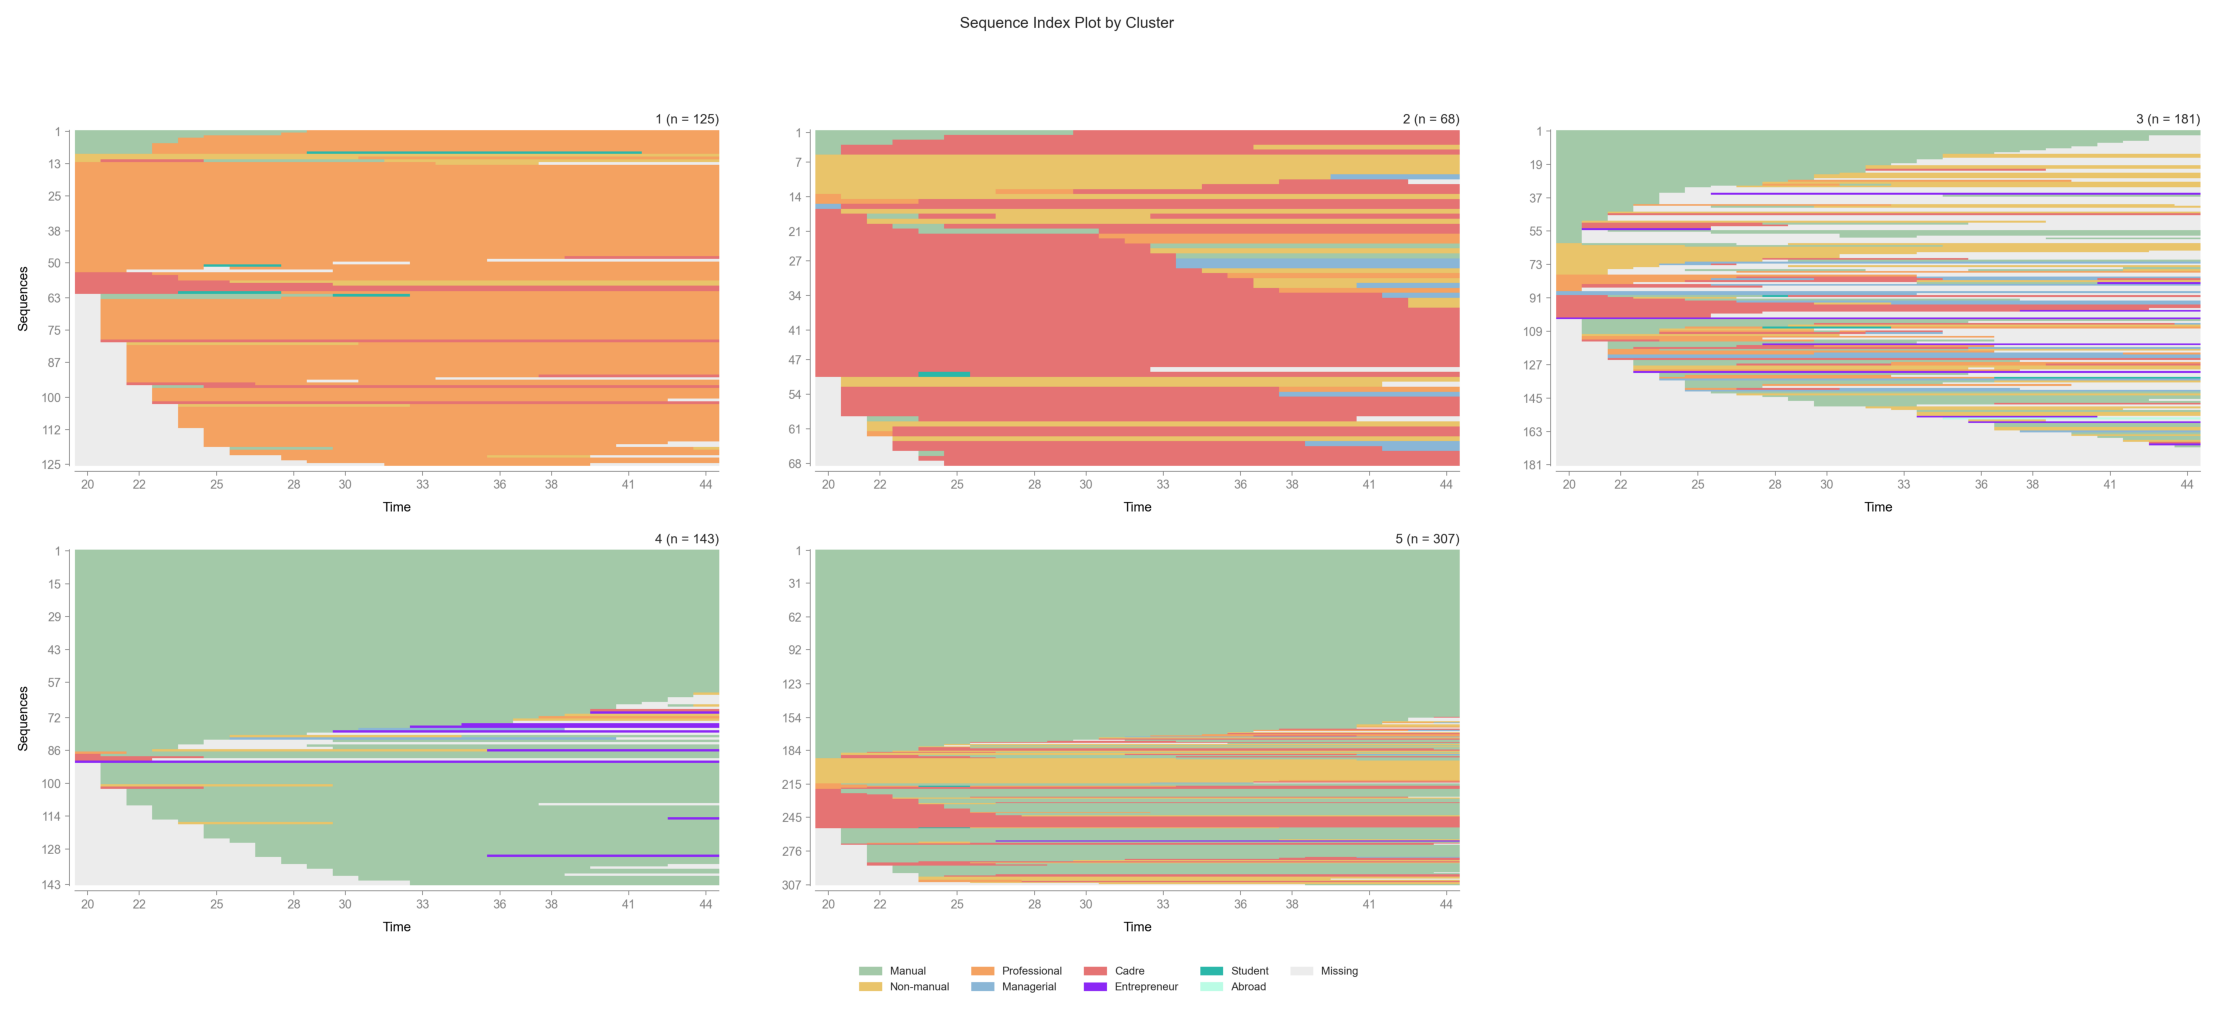

In [ ]:
plot_sequence_index(
    occupation_sequence_data,
    group_dataframe=membership_table,
    group_column_name="Cluster",
    # group_labels={1: "Late Family Formation", 2: "Early Partnership"},
    layout="column",
    title="Sequence Index Plot by Cluster"
)

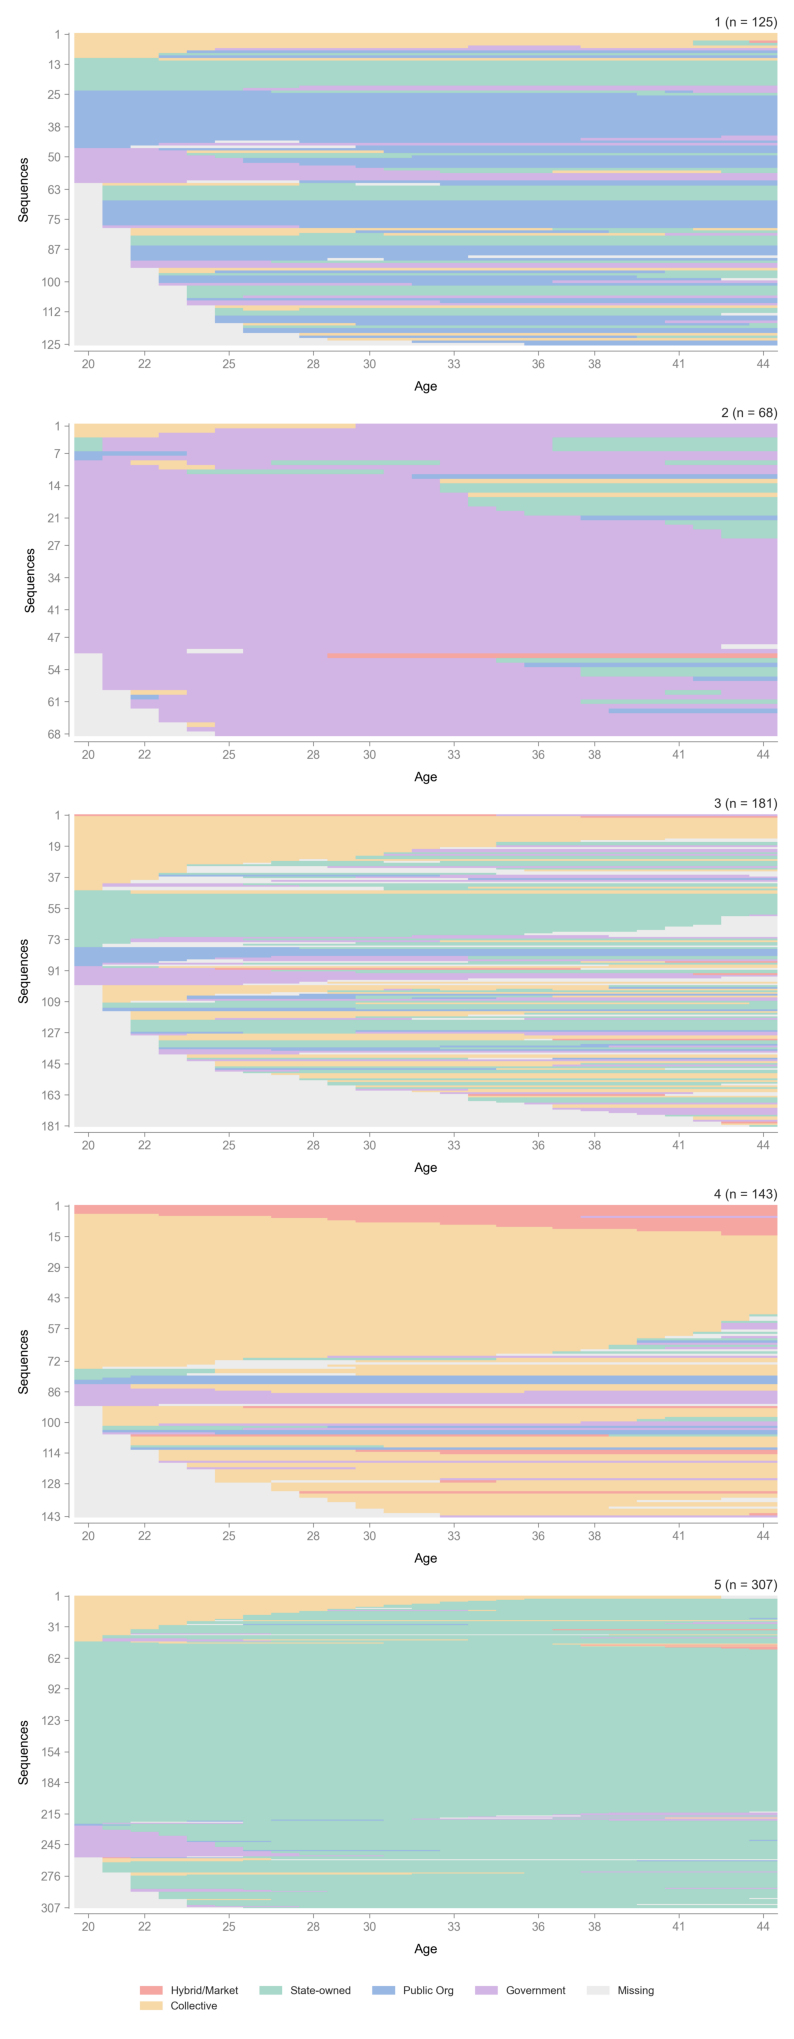

In [ ]:
plot_sequence_index(
    organization_sequence_data,
    group_dataframe=membership_table,
    group_column_name="Cluster",
    # group_labels={1: "Late Family Formation", 2: "Early Partnership"},
    layout="column",
    nrows=5,
    ncols=1,
    title=None,
    save_as="organization_sequence_index_plot_by_5_clusters.png",
    dpi=300,
    xlabel="Age",
)

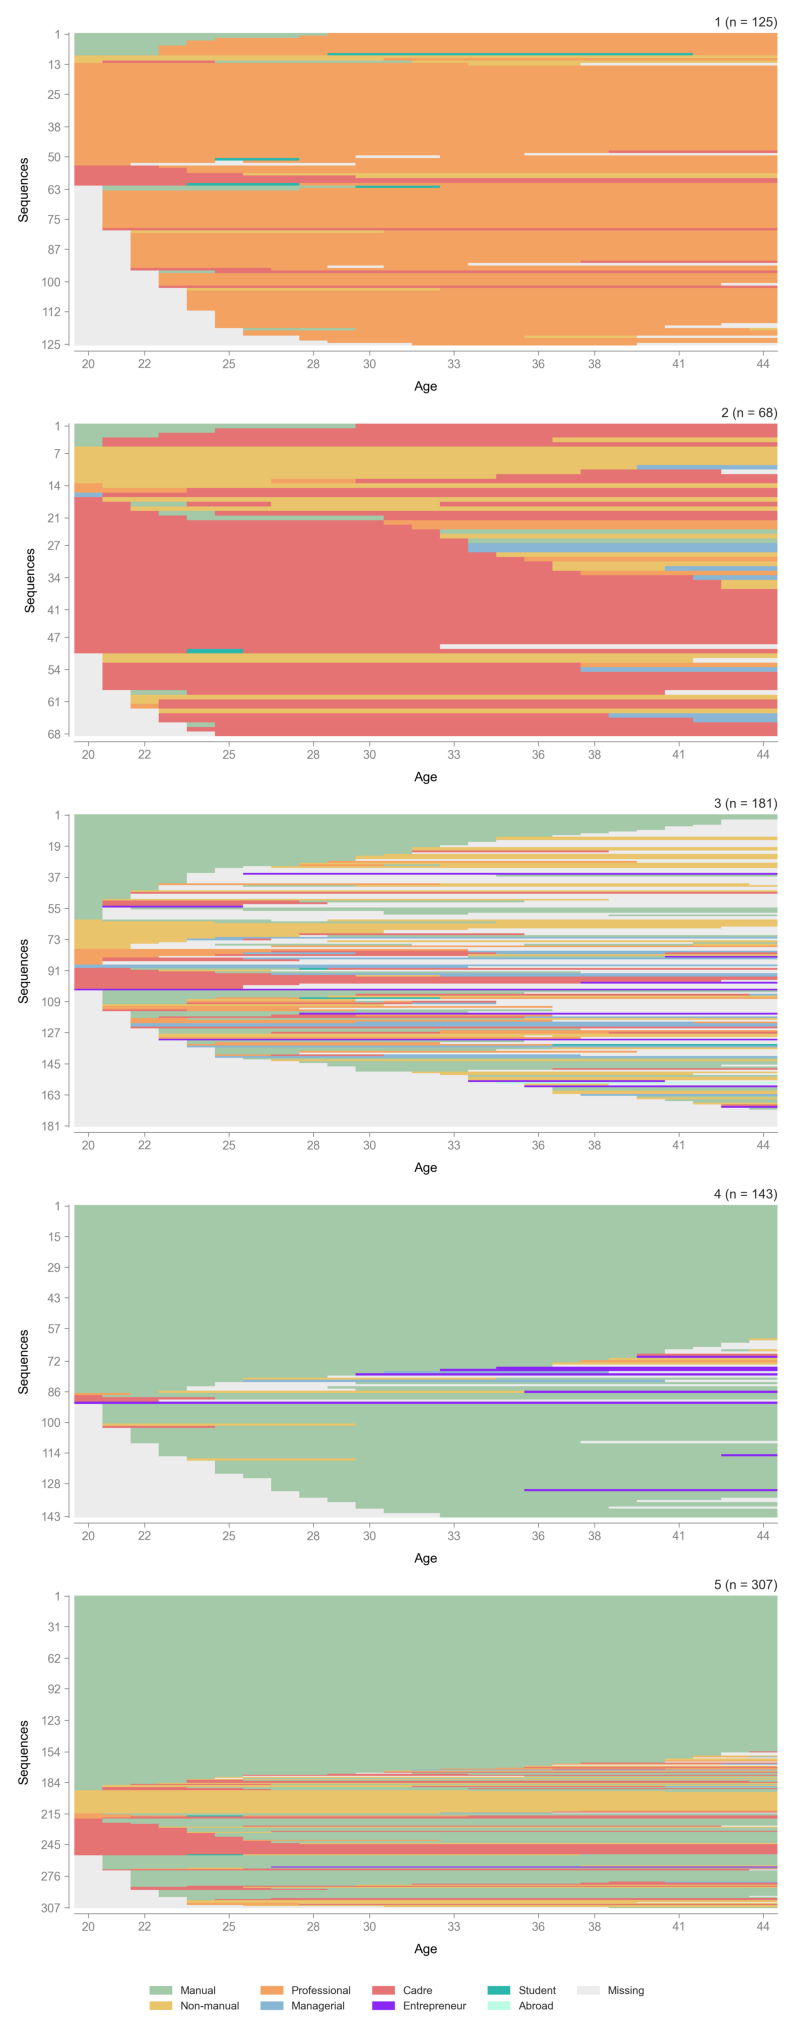

In [ ]:
plot_sequence_index(
    occupation_sequence_data,
    group_dataframe=membership_table,
    group_column_name="Cluster",
    # group_labels={1: "Late Family Formation", 2: "Early Partnership"},
    layout="column",
    nrows=5,
    ncols=1,
    title=None,
    save_as="occupation_sequence_index_plot_by_5_clusters.png",
    dpi=300,
    xlabel="Age",
)

4 clusters

     Entity ID  Cluster
0    110101025        2
1    110102012        1
2    110103037        4
3    110103040        4
4    110103041        4
..         ...      ...
819  620315150        4
820  620316157        4
821  620317162        4
822  620318173        4
823  620318178        4

[824 rows x 2 columns]
   Cluster  Count  Percentage
0        1    125       15.17
1        2    249       30.22
2        3    143       17.35
3        4    307       37.26


/Users/lei/Documents/Sequenzo_all_folders/Sequenzo-main/sequenzo/clustering/hierarchical_clustering.py:1229: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Cluster', y=y_column, data=distribution, palette='pastel')


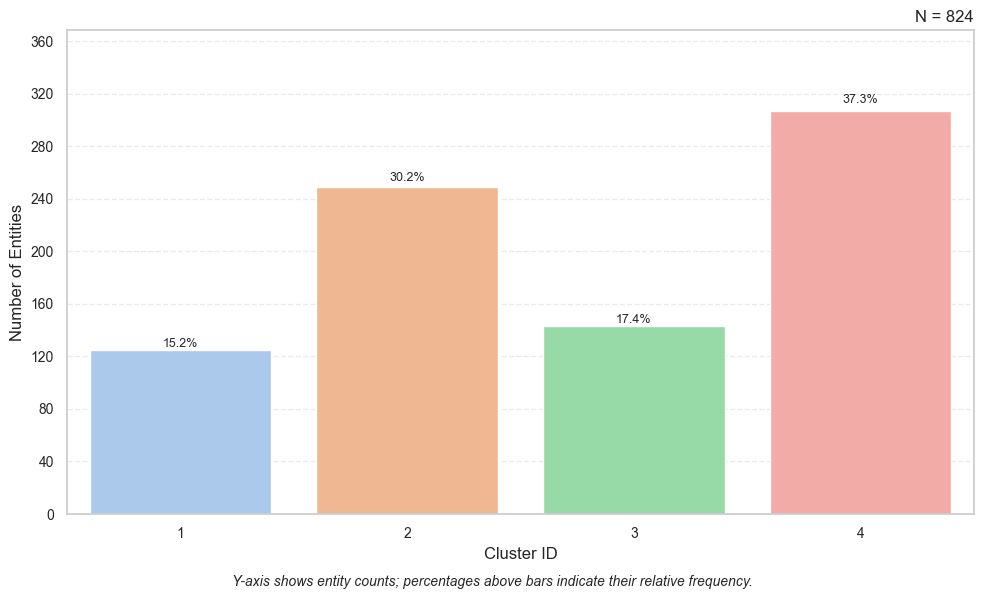

In [ ]:
cluster_results = ClusterResults(cluster)
membership_table = cluster_results.get_cluster_memberships(num_clusters=4)
print(membership_table)
distribution = cluster_results.get_cluster_distribution(num_clusters=4)
print(distribution)
cluster_results.plot_cluster_distribution(num_clusters=4, save_as="distribution.png", title=None)

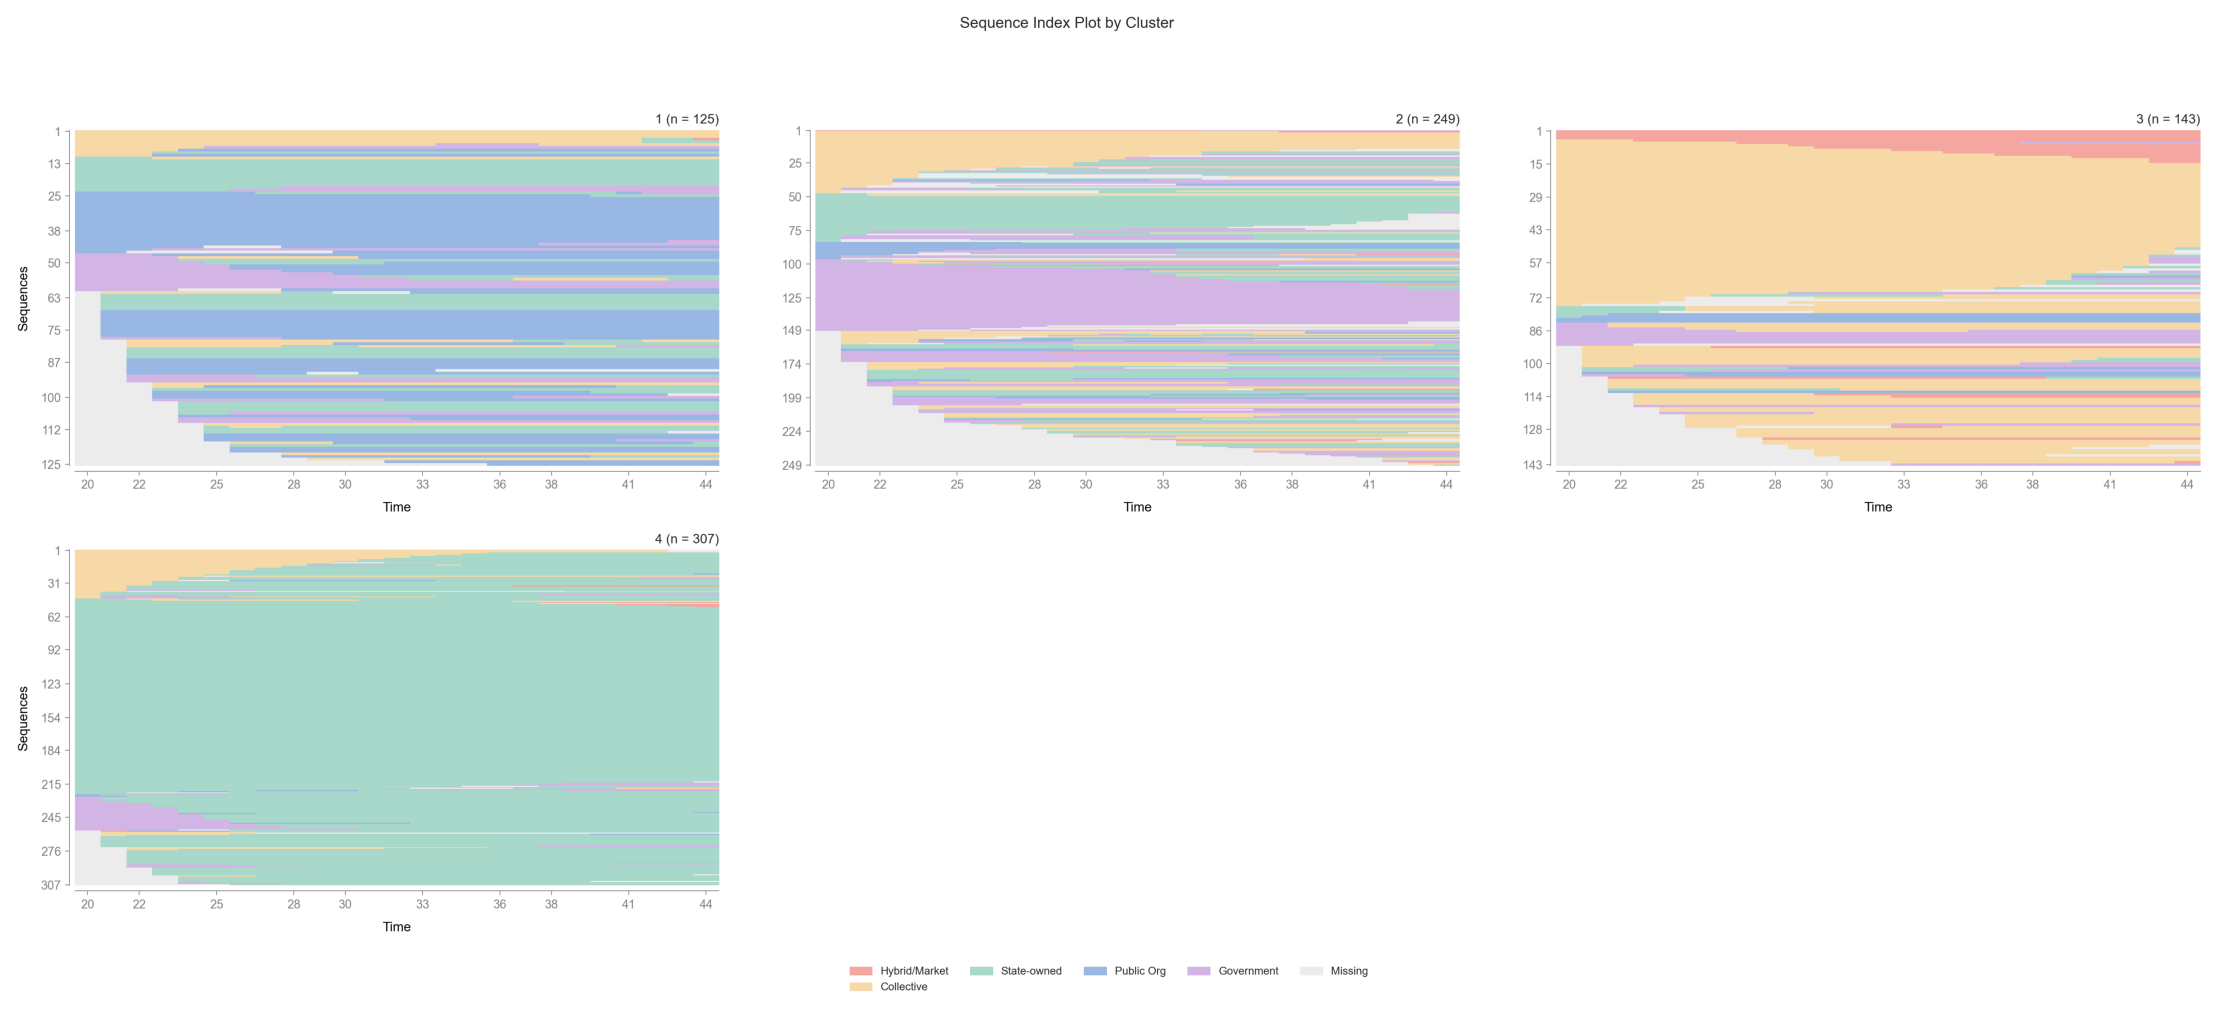

In [ ]:
plot_sequence_index(
    organization_sequence_data,
    group_dataframe=membership_table,
    group_column_name="Cluster",
    # group_labels={1: "Late Family Formation", 2: "Early Partnership"},
    layout="column",
    title="Sequence Index Plot by Cluster"
)

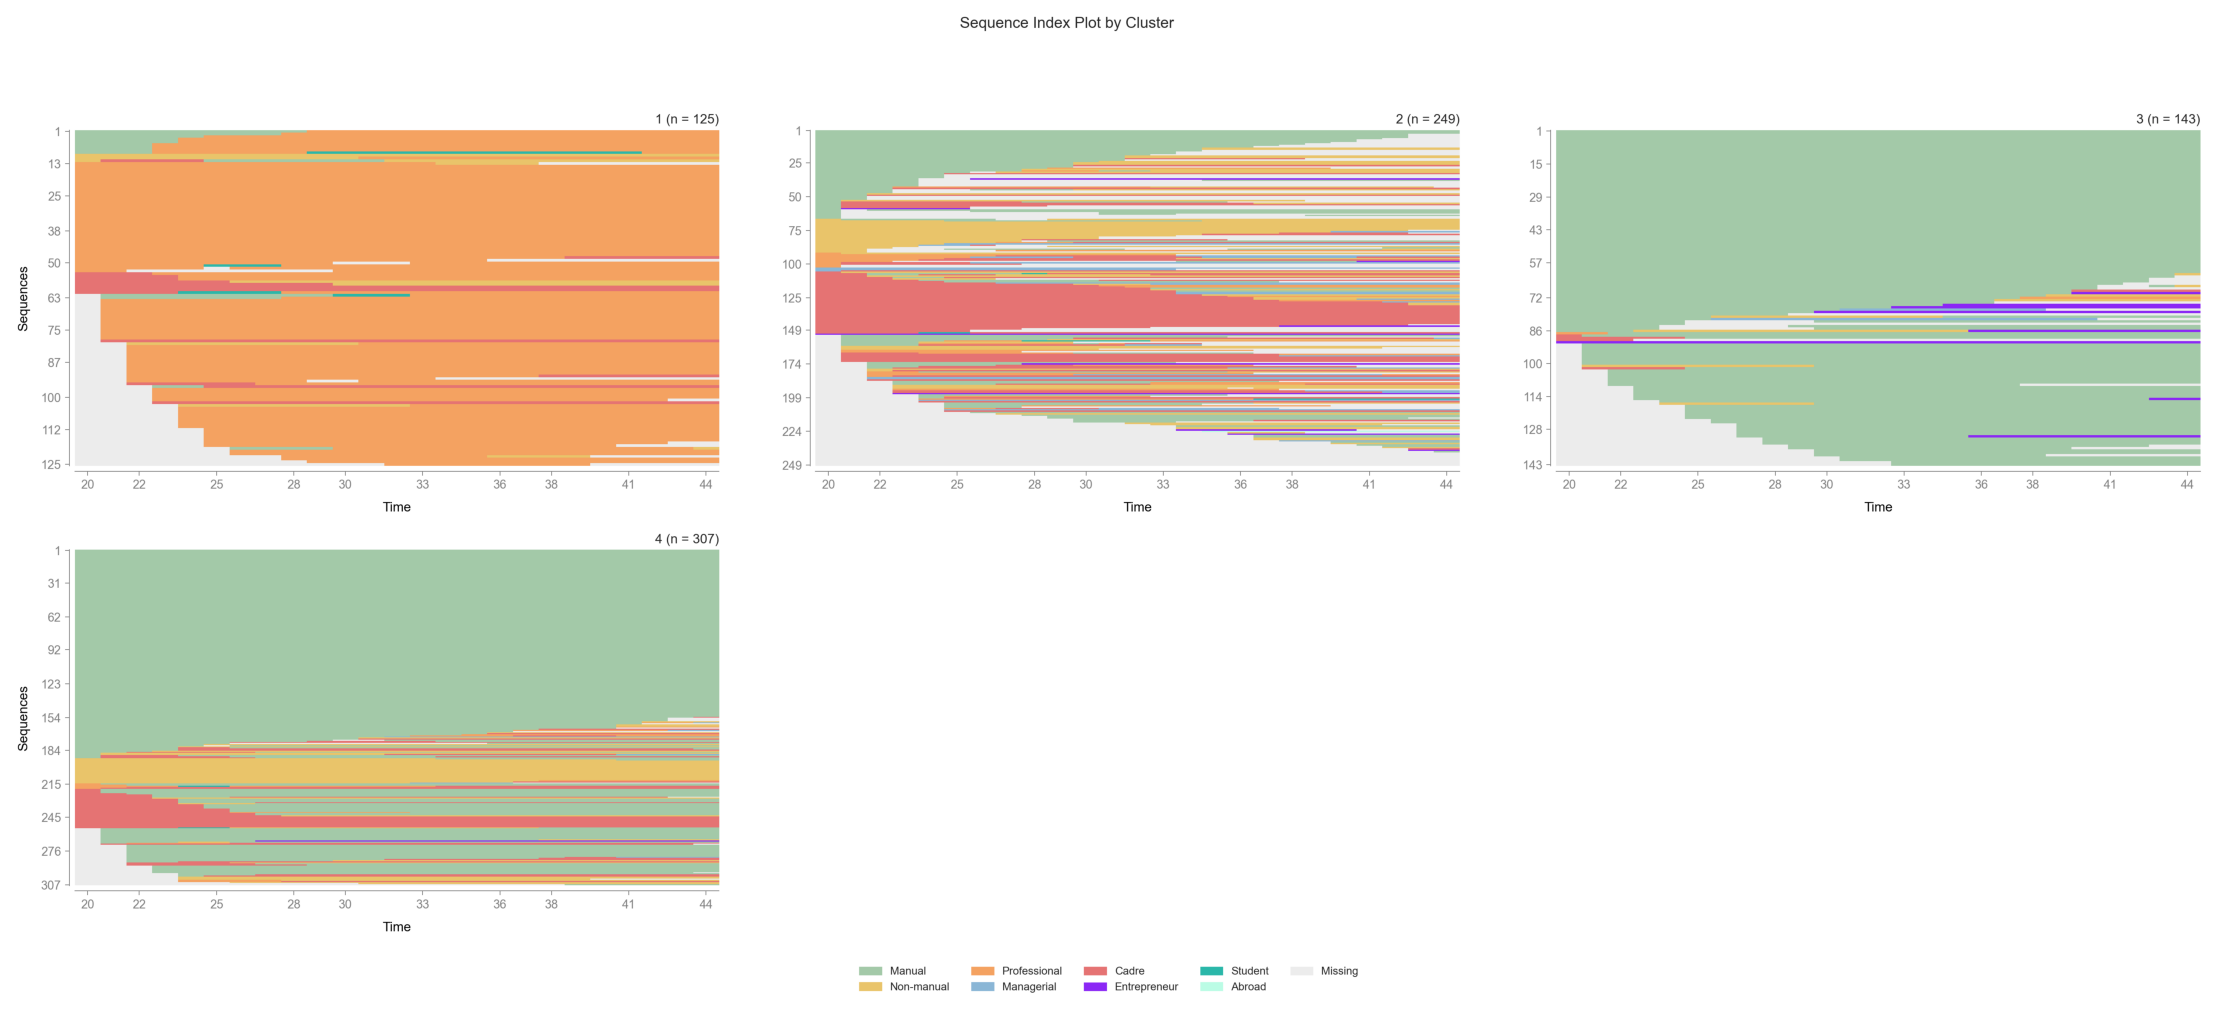

In [ ]:
plot_sequence_index(
    occupation_sequence_data,
    group_dataframe=membership_table,
    group_column_name="Cluster",
    # group_labels={1: "Late Family Formation", 2: "Early Partnership"},
    layout="column",
    title="Sequence Index Plot by Cluster"
)

TODO: download the membership table for 6 clusters. then do regression analysis in another ipynb. 

TODO: 是不是 x-tick有点问题？怎么是20-44岁，不是45岁呢？而且一格一格的不是很规则，不知道怎么回事。要在 sequenzo-main 里面看一下，进行调整